# Mnist Classification using scikitLearn

In [1]:
# Adding our data to the sklearn dataset location
from sklearn.datasets._base import get_data_home
get_data_home()

'C:\\Users\\Soundharya S\\scikit_learn_data'

In [2]:
# use this code for older version sklearn(v 0.19)

# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata("MNIST original")

In [3]:
# for latest version (v 0.24 or unstable)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [4]:
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(y)

['5' '0' '4' ... '4' '5' '6']


 ## importing libraries

In [6]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
pixels = pd.DataFrame(x)
labels = pd.DataFrame(y)

In [8]:
pixels.loc[0].values #value of zero th element

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
labels.loc[0].values #element in position 2nd

array(['5'], dtype=object)

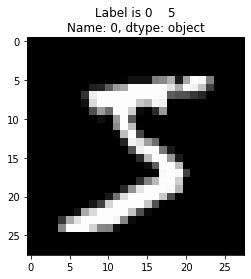

In [10]:
#visualisation
pixel = pixels.loc[0]
label = labels.loc[0]

pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()

## splitting our dataset to train and test

In [11]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0) 

In [12]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (60000, 784)
x_test (10000, 784)
y_train (60000,)
y_test (10000,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
y_pred = model.predict(x_test)

In [15]:
#Accuracy
model.score(x_test, y_test)

0.9679

## Another way of getting Accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9679

In [17]:
y_test[0]

'7'

## predicting

In [18]:

y_predicted = model.predict(x_test[0].reshape(1,-1))
print(y_predicted)

['7']


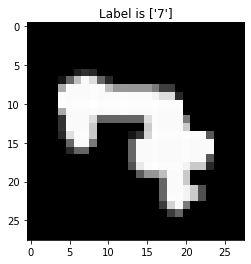

In [19]:

label = y_predicted
pixel =x_test[0]

pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()

In [25]:
 
# Training a binary classifier.
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
#fitting random classifier
model.fit(x_train,y_train_5)
y_pred_5=model.predict(x_test)
 

In [26]:
from sklearn.metrics import confusion_matrix 
cn_matrix=confusion_matrix(y_train_5, y_pred_5)
print(cn_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 10000]